In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
import seaborn as sns

%matplotlib inline

In [15]:
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['figure.facecolor'] = '#00000000'

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/shelly2904/DATA_SCIENCE/master/data/medical-charges.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe() # to see if the range of data makes sense

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


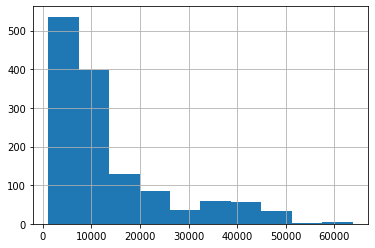

In [7]:
df['charges'].hist()

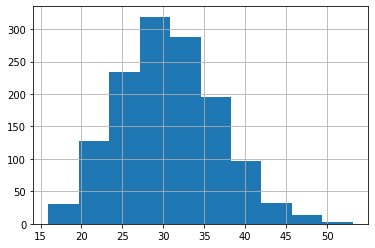

In [8]:
df['bmi'].hist()

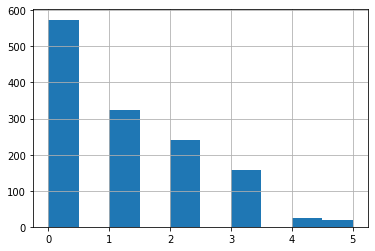

In [10]:
df['children'].hist()


Check for following
1. Data range makes sense
2. Any missing values?
3. Skewness in data columns


### Exploratory Data Analysis

#### Age

In [16]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [18]:
# Awesome thing
fig = px.histogram(df, 
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

Almost uniform, except for ages 18 and 19.

#### BMI

In [19]:
df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [22]:
# Awesome thing
fig = px.histogram(df, color_discrete_sequence=['red'],
                   x='bmi',
                   marginal='box',
                   nbins=47,
                   title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

Gaussian distribution and few outliers

#### Charges

In [23]:
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [24]:
# Awesome thing
fig = px.histogram(df, color_discrete_sequence=['green', 'grey'],
                   x='charges',
                   color='smoker',
                   marginal='box',
                   nbins=47,
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

Skewed distribution and few outliers for people who are not smokers

In [25]:
# Awesome thing
fig = px.histogram(df, color_discrete_sequence=['blue', 'grey'],
                   x='charges',
                   color='sex',
                   marginal='box',
                   nbins=47,
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

High medical charges for women may be because of pregnancy.

In [27]:
# Awesome thing
fig = px.histogram(df, color_discrete_sequence=['blue', 'grey', 'green', 'red'],
                   x='charges',
                   color='region',
                   marginal='box',
                   nbins=47,
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

#### Smoker

In [29]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [32]:
# Awesome thing
fig = px.histogram(df,
                   x='smoker',
                   color='sex',
                   title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

#### Relationship between Age and Charges

In [34]:
fig = px.scatter(df, x='age', y='charges',
                 color='smoker', opacity=0.8, hover_data=['sex'],
                   title='Age vs Charges')
fig.update_layout(bargap=0.1)
fig.show()